In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt



In [2]:
# Getting the block info dataset
y_validation = pd.read_csv('./datasets/validation_y.csv')
y_rf_n10_scaled = pd.read_csv('./datasets/rf_n10_scaled.csv')
y_rf_n10_log = pd.read_csv('./datasets/rf_n10_log.csv')

In [3]:
y_validation = y_validation.drop(columns=['Unnamed: 0'])
y_validation = y_validation.rename(columns={"0":"min_tip"})
y_validation = np.array(y_validation['min_tip'])

y_rf_n10_log = y_rf_n10_log.drop(columns=['Unnamed: 0'])
y_rf_n10_log = y_rf_n10_log.rename(columns={"0":"min_tip"})
y_rf_n10_log = np.array(y_rf_n10_log['min_tip'])

y_rf_n10_scaled = y_rf_n10_scaled.drop(columns=['Unnamed: 0'])
y_rf_n10_scaled = y_rf_n10_scaled.rename(columns={"0":"min_tip"})
y_rf_n10_scaled = np.array(y_rf_n10_scaled['min_tip'])

In [4]:
avg_y = []
for i in range(0,len(y_rf_n10_scaled)):
    avg_y.append((y_rf_n10_scaled[i]+y_rf_n10_log[i])/2)

avg_y = np.array(avg_y)
avg_y

array([17.05325048,  3.71108527, 18.55310887, ...,  4.12677181,
        4.07847634,  4.63589333])

In [5]:
print('mean_squared_error for model with info for 10 blocks scaled: ', mean_squared_error(y_validation, avg_y))
print('mean_absolute_error for model with info for 10 blocks scaled: ', mean_absolute_error(y_validation, avg_y))

mean_squared_error for model with info for 10 blocks scaled:  138.8626513126061
mean_absolute_error for model with info for 10 blocks scaled:  3.851968838967112


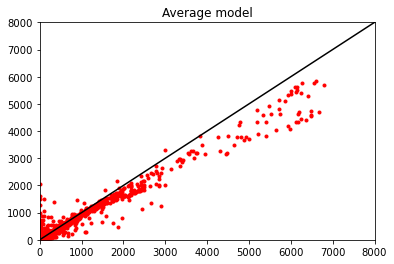

In [6]:
line=np.linspace(0,np.max(y_validation)+1,len(y_validation)) 

plt.plot(y_validation,avg_y,'r.') # x vs y
plt.plot(line,line,'k-') # identity line

plt.title('Average model')


plt.xlim(0,8000)
plt.ylim(0,8000)
plt.show()

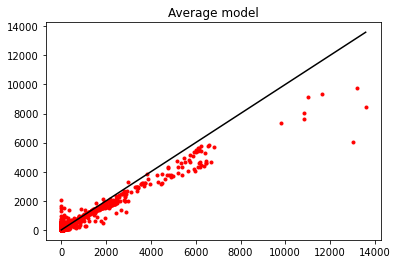

In [7]:
line=np.linspace(0,np.max(y_validation)+1,len(y_validation)) 

plt.plot(y_validation,avg_y,'r.') # x vs y
plt.plot(line,line,'k-') # identity line

plt.title('Average model')


plt.show()

In [8]:
y_val_array = np.array(y_validation)
biggest_error=0
for i in range(0,len(y_val_array)):
    if biggest_error < abs(avg_y[i] - y_val_array[i]):
        biggest_error= abs(avg_y[i] - y_val_array[i])

biggest_error

6940.212402740894

In [9]:
y_val_array = np.array(y_validation)
lower_values=0
for i in range(0,len(y_val_array)):
    if avg_y[i] <= y_val_array[i]:
        lower_values=lower_values+1

print("Amount of predicted min tip that wouldn't be enough to go through:" , lower_values)
print("Percetage of predicted min tip that wouldn't be enough to go through: ", (lower_values/len(y_val_array)*100), "%")

Amount of predicted min tip that wouldn't be enough to go through: 13085
Percetage of predicted min tip that wouldn't be enough to go through:  0.5782369892258342 %


In [10]:
errors_validation = []
for i in range(0,len(y_val_array)):
    if abs(avg_y[i] - y_val_array[i]) <= 100:
        errors_validation.append(avg_y[i] - y_val_array[i])

erros_validation = np.array(errors_validation)

Text(0, 0.5, '# blocks')

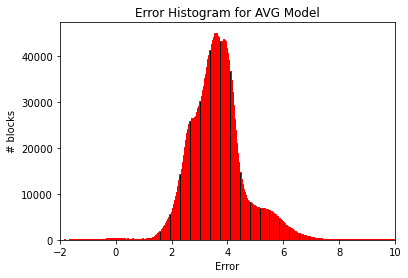

In [19]:
plt.hist(errors_validation, bins = 5000, color = 'black', edgecolor = 'red')
plt.xlim(-2,10)
plt.title('Error Histogram for AVG Model')
plt.xlabel('Error')
plt.ylabel('# blocks')